In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
secrets_file = open("spotipy.txt","r")

In [3]:
string = secrets_file.read()

In [4]:
s = string.split('\n')

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=s[0],
                                                           client_secret=s[1]))

In [6]:
playlist = sp.user_playlist_tracks("spotify", "4rnleEAOdmFAbRcNCgZMpY")

In [7]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [9]:
playlist['total']

5295

In [8]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [10]:
whole_playlist = get_playlist_tracks("4rnleEAOdmFAbRcNCgZMpY")

In [11]:
len(whole_playlist)

5295

In [12]:
whole_playlist[1]['track']['artists'][0]['name']

'Mike Posner'

In [13]:
def track_artists(spotify_tracks):
    artist = [whole_playlist[i]['track']['artists'][0]['name'] for i in range(len(spotify_tracks))]
    return artist

In [14]:
songs_artist = track_artists(whole_playlist)

In [16]:
import pandas as pd

In [21]:
df_artist = pd.DataFrame(songs_artist, columns=['artist'])
df_artist.shape

(5295, 1)

In [18]:
def track_name(spotify_tracks):
    name = [whole_playlist[i]['track']['name'] for i in range(len(spotify_tracks))]
    return name

In [19]:
songs_name = track_name(whole_playlist)

In [22]:
df_name = pd.DataFrame(songs_name, columns = ['name'])
df_name.shape

(5295, 1)

In [24]:
def track_uris(spotify_tracks):
    uris = [whole_playlist[i]['track']['uri'] for i in range(len(spotify_tracks))]
    return uris
song_uris = track_uris(whole_playlist)

In [26]:
df_uri = pd.DataFrame(song_uris, columns = ['uri'])
df_uri.shape

(5295, 1)

In [27]:
features = [sp.audio_features(i) for i in (song_uris)]

In [28]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [29]:
features1 = flatten(features)
features1[0]

{'danceability': 0.566,
 'energy': 0.664,
 'key': 4,
 'loudness': -5.303,
 'mode': 0,
 'speechiness': 0.0464,
 'acousticness': 0.634,
 'instrumentalness': 0,
 'liveness': 0.116,
 'valence': 0.437,
 'tempo': 128.945,
 'type': 'audio_features',
 'id': '7dS5EaCoMnN7DzlpT6aRn2',
 'uri': 'spotify:track:7dS5EaCoMnN7DzlpT6aRn2',
 'track_href': 'https://api.spotify.com/v1/tracks/7dS5EaCoMnN7DzlpT6aRn2',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7dS5EaCoMnN7DzlpT6aRn2',
 'duration_ms': 241688,
 'time_signature': 4}

In [30]:
danceability = [features1[i]['danceability'] for i in range(len(features1))]
energy = [features1[i]['energy'] for i in range(len(features1))]
key = [features1[i]['key'] for i in range(len(features1))]
loudness = [features1[i]['loudness'] for i in range(len(features1))]
mode = [features1[i]['mode'] for i in range(len(features1))]
speechiness = [features1[i]['speechiness'] for i in range(len(features1))]
acousticness = [features1[i]['acousticness'] for i in range(len(features1))]
instrumentalness = [features1[i]['instrumentalness'] for i in range(len(features1))]
liveness = [features1[i]['liveness'] for i in range(len(features1))]
valence = [features1[i]['valence'] for i in range(len(features1))]
tempo = [features1[i]['tempo'] for i in range(len(features1))]

In [31]:
df_features = pd.DataFrame.from_dict({'danceability':danceability, 'energy':energy, 'key':key, 'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 'acousticness':acousticness, 'instrumentalness':instrumentalness, 'liveness':liveness, 'valence':valence, 'tempo':tempo})
df_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945
1,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965
2,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558
3,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435
4,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024
...,...,...,...,...,...,...,...,...,...,...,...
5290,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034
5291,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088
5292,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008
5293,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012


In [32]:
df_final = pd.concat([df_artist, df_name, df_uri, df_features], axis=1)

In [34]:
df_final.shape

(5295, 14)

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [36]:
cluster_data = df_final.drop(['artist','name','uri'], axis=1)

In [37]:
scaler= StandardScaler().fit(cluster_data)
X_scaled = scaler.transform(cluster_data)

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=1234)

In [39]:
clusters = kmeans.predict(X_scaled)
pd.Series(clusters).value_counts().sort_index()

0    1473
1     157
2    3665
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

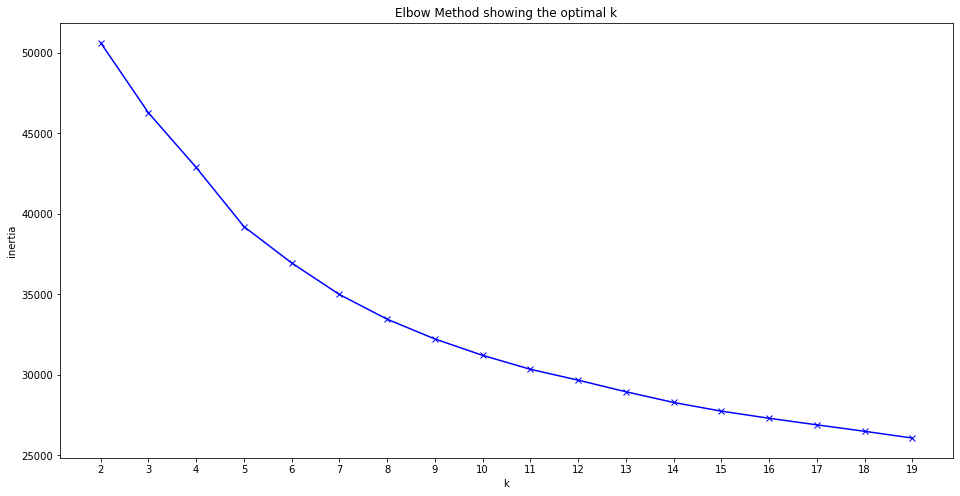

In [41]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [42]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)
pd.Series(clusters).value_counts().sort_index()

0     646
1    1786
2     667
3    2046
4     150
dtype: int64

In [44]:
clusters.shape

(5295,)

In [45]:
kmeans.inertia_ 

39212.12453358288

In [46]:
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=30,  
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

42181.02496034106


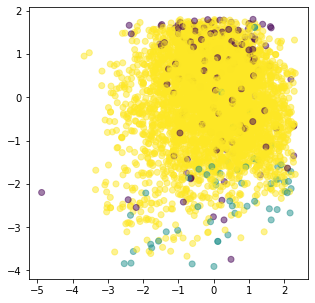

In [47]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='complete')
pred = agglomerative.fit_predict(X_scaled)

plt.figure(figsize=(5, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pred,alpha=0.5)
plt.show()

In [48]:
df_final['cluster'] = clusters

In [49]:
df_final

,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Hozier,Take Me To Church,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.63400,0.000000,0.116,0.437,128.945,0
1,Mike Posner,Cooler Than Me - Single Mix,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.17900,0.000000,0.689,0.625,129.965,1
2,"Tyler, The Creator",See You Again (feat. Kali Uchis),spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.37100,0.000007,0.109,0.620,78.558,0
3,Bastille,Pompeii,spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.07550,0.000000,0.271,0.571,127.435,3
4,Shakira,Hips Don't Lie (feat. Wyclef Jean),spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.405,0.758,100.024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,MARINA,Hermit the Frog,spotify:track:4Zcz6saEkOII3PlXd9gN3o,0.609,0.679,0,-4.545,1,0.0312,0.24300,0.000000,0.199,0.487,122.034,3
5291,Olivia Rodrigo,deja vu,spotify:track:61KpQadow081I2AsbeLcsb,0.439,0.610,9,-7.236,1,0.1160,0.59300,0.000011,0.341,0.172,181.088,0
5292,BIA,WHOLE LOTTA MONEY,spotify:track:5yorXJWdBan1Vlh116ZtQ7,0.897,0.371,1,-5.019,1,0.3680,0.09040,0.000000,0.325,0.441,81.008,2
5293,Ashnikko,Slumber Party (feat. Princess Nokia),spotify:track:11ZulcYY4lowvcQm4oe3VJ,0.964,0.398,11,-8.981,0,0.0795,0.00151,0.000039,0.101,0.563,105.012,1


In [52]:
topsongs = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\DAFT\Day26 Lab\lab-web-scraping-single-page\topsongs.csv')
# topsongs

In [53]:
import random

In [54]:
def features_api(track, artist):
    track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')
    uri = track_id["tracks"]["items"][0]['id']
    features_api = sp.audio_features(uri)
    return features_api

In [55]:
def recommend():
    new_song = input("Enter a song: ").lower()
    new_artist = input("Enter an artist: ").lower()
    try:
        
        if new_song in np.array(topsongs['song']):
            return random.choice(np.array(topsongs['song']))
        else:
            feature = features_api(new_song, new_artist)
            column = list(feature[0].keys())
            values = [list(feature[0].values())]
            df_new_song = pd.DataFrame(data = feature, columns = column)
            df_new_song = df_new_song.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'],axis=1)
            std_new_song = scaler.transform(df_new_song)
            new_cluster = kmeans.predict(std_new_song)
            df_cluster = df_final[df_final['cluster'] == list(new_cluster)[0]]
        

            print('Your recommendation:',random.choice(list(df_cluster['name'])))
    except:
         print('Ups! This song is not exist! Please try a new one')

In [59]:
recommend()

Enter a song: git
Enter an artist: sezen aksu
Your recommendation: Would I Lie to You - Radio Edit


In [58]:
df_final.to_csv("playlist.csv")

In [ ]:
# import pickle
# filename = 'cluster'
# pickle.dump(clusters, open(filename, 'wb'))